# Logistic Regression from Scratch

### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{y}_i - y_i)^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{y}_i - y_i)x_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)
    

### Let's come back to Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

    We know that $\texttt{range}(X \cdot \theta) =  (-\infty, \infty)$

    We need to find a function $g(x)$ such that it maps infinity to 0 and 1.

    That $g(x) = 1 / (1 + e^{-x})$

    So if you combine $g(x)$ with $h(\theta)$, then you will get
    
    $h(g(x)) = 1 / (1 + e^{-(X \cdot \theta)})$


2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{y}_i - y_i)^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{y}_i - y_i)x_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#1. I want you to define this function g(x)
sigmoid = lambda x: 1/(1+np.exp(-x))

#2. I want you to simulate x from -5 to 5
x = np.linspace(-5,5,50)
y = sigmoid(x)

#3. Try to plot it

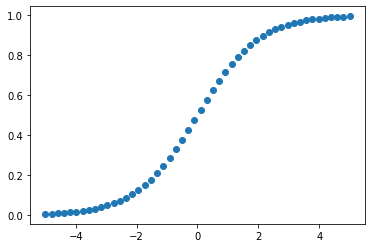

In [8]:
plt.scatter(x,y)

In [61]:
X = np.random.rand(20,2)
y = np.random.rand(20,)


SyntaxError: invalid syntax (3741481458.py, line 3)

In [47]:
theta =np.array([0.03,0.02])
theta.shape

(2,)

In [60]:
y_hat = X @ theta;
print(y_hat[:5]);
y_disi_hat = sigmoid(y_hat);
print(f'\n{y_disi_hat}');
# y_hat_sion = (y_disi_hat > 0.5).astype(int)
print()
print(y_hat_sion := np.round(y_disi_hat))

[0.02928022 0.03154778 0.02859192 0.02794716 0.02102182]

[0.50731953 0.50788629 0.50714749 0.50698634 0.50525526 0.51153194
 0.51070906 0.50822464 0.5038749  0.50990498 0.50932592 0.5037692
 0.50839109 0.50484155 0.5064762  0.50793611 0.50871269 0.50810343
 0.50694688 0.50513883]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [111]:
y = np.array([1,1,1,1,0,0,0,0])
y_bad = np.array([.01,.21,.71,.01,.2,.9,.9,.8])
y_good = np.array([.99,.98,.97,.55,0.1,0.23,0.1,0.09])

In [112]:
binary_cross_entropy = lambda y,y_hat: -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [127]:
b = binary_cross_entropy(y,y_bad);c = binary_cross_entropy(y,y_good)

In [128]:
print(f'good :{c}\nbad : {b}')

good :1.2249457263326513
bad : 17.55123007892403


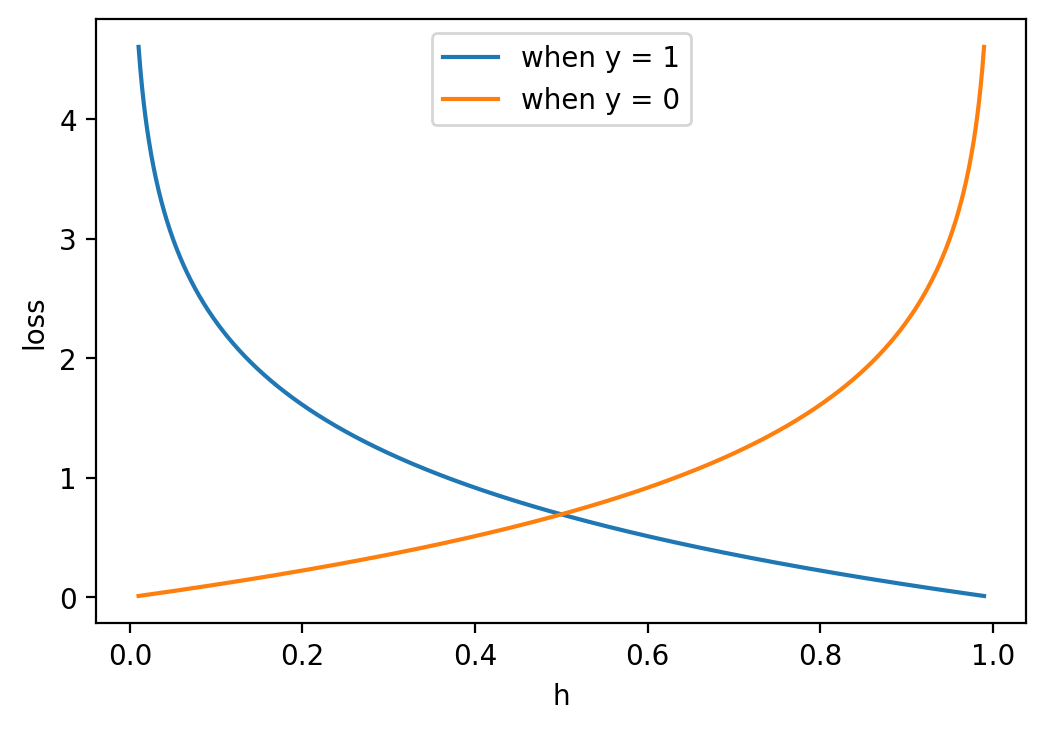

In [125]:
# from cProfile import label


h = np.linspace(0.01,0.99,1000)
plt.figure(dpi = 200)
f = plt.plot(h,-np.log(h),label = 'when y = 1')
s = plt.plot(h,-np.log(1-h),label = 'when y = 0')
plt.xlabel('h')
plt.ylabel('loss')
plt.legend()
plt.show()

In [137]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [141]:
cancer = load_breast_cancer()

In [142]:
X = cancer.data
y = cancer.target

In [143]:
from sklearn.model_selection import train_test_split

#split here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 9999
)

#assert that X_train and y_train have the same amount of samples
assert X_train.shape[0] == y_train.shape[0]

#assert that X_test and y_test have the same amount of samples
assert X_test.shape[0] == y_test.shape[0]

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#standardize the training set
X_train = sc.fit_transform(X_train)

#standardize the test set
X_test = sc.transform(X_test)

In [145]:
intercept = np.ones((X_train.shape[0], 1))
intercept.shape

#hint: use np.concatenate with X_train on axis=1, to add these ones to X_train
X_train = np.concatenate((intercept, X_train), axis=1)

intercept = np.ones((X_test.shape[0], 1))
intercept.shape

#hint: use np.concatenate with X_test on axis=1, to add these ones to X_test
X_test = np.concatenate((intercept, X_test), axis=1)


In [204]:
class LogisticRegression(object):
    def __init__(self):
        self.max_iter = 200
        self.alpha = 0.005
        pass

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
        
    def binary_cross_entropy(self,y,y_hat):
        return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))


    def _grad(self,X, error):
        return X.T @ error

        
    def fit(self,X_train, y_train):
        self.theta = np.ones(X_train.shape[1])

        for i in range(self.max_iter):
            yhat = self._predict(X_train)
            # print(yhat.shape) 
            # print(y_train.shape)
            deriv = self._grad(X_train, (yhat - y_train))
            self.theta = self.theta - self.alpha * deriv 
        
        self.coef = self.theta[1:]
        self.bias = self.theta[:1]
            
        return self.bias,self.coef

    def _predict(self,X):
        return self.sigmoid(X @ self.theta) 
    def predict(self,X):
        return np.round(self.sigmoid(X @ self.theta) )

In [205]:
lgr = LogisticRegression()

In [206]:
lgr.fit(X_train, y_train)

(array([0.52246432]),
 array([-0.61842197, -0.73970415, -0.63516161, -0.6119647 , -0.24183818,
         0.23529056, -1.10290861, -1.08692839,  0.00944474,  1.00730322,
        -0.72580783,  0.82317764, -0.33415654, -0.64744277, -0.54921678,
         0.98389626, -0.21679684, -0.15913205,  0.2406677 ,  0.86351994,
        -1.36590581, -1.96983644, -1.17838368, -1.17140611, -1.29807659,
         0.34888461, -0.77127605, -1.40047221, -1.40679409, -0.39307556]))

In [207]:
print(lgr.theta.shape)

(31,)


In [208]:
print(X_train.shape)

(398, 31)


In [211]:
from sklearn.metrics import classification_report,accuracy_score
classification_report(y_test,lgr.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        53\n           1       0.97      0.99      0.98       118\n\n    accuracy                           0.97       171\n   macro avg       0.97      0.96      0.97       171\nweighted avg       0.97      0.97      0.97       171\n'

In [212]:
accuracy_score(y_test,lgr.predict(X_test))

0.9707602339181286